1.	Create the following three datasets.

o	Create a list of 100,000 names (randomly pick 10 characters e.g. abcdefghij, any order is fine, just make sure there are no duplicates names) and store those names in an unsorted list.

o	Now store the above names in a set (https://docs.python.org/3.7/library/stdtypes.html ). 

o	Make a separate copy of the list and sort it using any sorting algorithm that you have learned so far and justify why are you using it. Capture the time it takes to sort the list.

At this point you should have three collections: 
(1) an unsorted list of names,
(2) a set of those same names, and
(3) a sorted list of the same names.  

Something like this:
names_unsrt = ['B', 'X', 'T'],
names_set = {'B', 'X', 'T'}, and
names_srt = ['B', 'T', 'X'] 

2.	Pick the names from the unsorted array that are at 10,000th, 30,000th, 50,000th, 70,000th, 90,000th, and 100,000th positions, and store them in a temporary array somewhere for later use.

3.	Now search for these six names in each of the collections.  Use linear search for the unsorted list, binary search for the sorted list, and use the set.remove() (or the in keyword) builtin for the set.  Capture the time it takes using all three algorithms.

4.	Create a table and plot comparing times of linear search, binary search and set lookup for the six names using Python (matplotlib or Seaborn) or JavaScript (D3) visualization tools to illustrate algorithm performance. 

Prepare an executive summary of your results, referring to the table and figures you have generated. Explain how your results relate to big O notation. Describe your results in language that management can understand. This summary should be included as text paragraphs in the Jupyter notebook. Explain how the algorithm works and why it is a useful to data engineers.


In [91]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
import matplotlib.style as style
from decimal import Decimal
import random
import string
import matplotlib.ticker as mtick

from platform import python_version

print("python version",python_version())

import os
import platform


python version 3.8.5


# 1. Create the following three datasets.


#    o Create a list of 100,000 names (randomly pick 10 characters e.g. abcdefghij, any order is fine, just make sure there are no duplicates names) and store those names in an unsorted list.

In [92]:
#use random seed generator 
random.seed(0)

# generate uniformly distributed random strings of lenght 10
array_name_100k = [''.join(random.choices(string.ascii_letters, k = 10)) for _ in range(1000000)]

# check for duplicates with python set function 

In [93]:
# set removes duplicate values 
len(set(array_name_100k))

1000000

# o Now store the above names in a set (https://docs.python.org/3.7/library/stdtypes.html ).

In [94]:
set_array_100k = set(array_name_100k)

# o Make a separate copy of the list and sort it using any sorting algorithm that you have learned so far and justify why are you using it. Capture the time it takes to sort the list.

In [95]:
#Make copy of the 100k name array
lst_name_100k_copy = array_name_100k

I will use Quick sort as it is considered one of the fastest sorting algorithms.Quick sort is an in-place sorting algorithm, that means that no additional storage space is needed to perform sorting. It has an average time complexity of O(n*log*n) and space complexity of O(n*log*n): log(n) for partition and O(n) for traversing the subarrays
 


In [96]:
# -*- coding: utf-8 -*-
"""
Created on Tue Jan 29 21:07:05 2019

@author: dev2
"""

def quicksort(array):
    
  #print("Sorting array: {0}".format(array))  
    
  if len(array) < 2:
    # base case, arrays with 0 or 1 element are already "sorted"
    return array
  else:
    # recursive case
    pivot = array[0]
    # sub-array of all the elements less than the pivot
    less = [i for i in array[1:] if i <= pivot]
    # sub-array of all the elements greater than the pivot
    greater = [i for i in array[1:] if i > pivot]
    
   # print("{0} <{1}> {2}".format(less, pivot, greater))
    
    return quicksort(less) + [pivot] + quicksort(greater)

In [97]:
# create runtime function that take 2 arguments. array and sorting function 
def sort_run_time(arr, func):
    start_time = time.perf_counter()
    func(arr)
    run_time = time.perf_counter()- start_time
    return run_time

In [98]:
# create a list to capture quicksort runtime for the copy of the array list 

time_quicksort_name_100k = sort_run_time(lst_name_100k_copy, quicksort)

# savee the sorted array to a new variable 
sorted_name_100k = quicksort(lst_name_100k_copy)

print("Runtime for Quick sort:",time_quicksort_name_100k)

Runtime for Quick sort: 4.039685599999757


# 2. Pick the names from the unsorted array that are at 10,000th, 30,000th, 50,000th, 70,000th, 90,000th, and 100,000th positions, and store them in a temporary array somewhere for later use.

In [99]:
# create 5 variable to store 5 names based on index 0,000th, 30,000th, 50,000th, 70,000th, 90,000th, and 100,000th

idx_10k = array_name_100k[10000]
idx_30k = array_name_100k[30000]
idx_50k = array_name_100k[50000]
idx_70k = array_name_100k[70000]
idx_100k = array_name_100k[100000]

# put 5 variable in an array

idx_list = np.array( [idx_10k,  idx_30k, idx_50k, idx_70k, idx_100k])

print(idx_list)

['uGOtJPnNVj' 'QgKtYrCyOt' 'goaJxmsTmT' 'YWZrhkLxnJ' 'rhDvYVURsY']


# 3. Now search for these six names in each of the collections. Use linear search for the unsorted list, binary search for the sorted list, and use the set.remove() (or the in keyword) builtin for the set. Capture the time it takes using all three algorithms.

In [100]:
# create runtime function that take 3 arguments. array and search function and item that needs to be searched
def search_run_time(arr, func, item ):
    start_time = time.perf_counter()
    func(arr,item)
    run_time = time.perf_counter()- start_time
    return run_time

In [101]:
def setremove_run_time(arr, item):
    start_time = time.perf_counter()
    arr.remove(item)
    run_time = time.perf_counter()- start_time
    return run_time

In [102]:
# define fucntion for binary search algorithm 

def binary_search(list, item):
    # low and high keep track of which part of the list you'll search in.
    low = 0
    high = len(list) - 1

    # While you haven't narrowed it down to one element ...
    while low <= high:
      # ... check the middle element
      mid = (low + high) // 2
      guess = list[mid]
      # Found the item. return index number
      if guess == item:
        return mid
      # The guess was too high.
      if guess > item:
        high = mid - 1
      # The guess was too low.
      else:
        low = mid + 1

    # Item doesn't exist
    return None

In [103]:
# define fucntion for simple search algorithm 

def simple_search(list, item):
    
    # for loop to iterate through the list and
    
    for i in range(len(list)):
        #  check if item matches 
        if list[i] == item:
            # return item index number in the list
            return i
    # item not in list        
    return None
    

In [104]:
# use for loop to Capture the time it takes using all three algorithms

time_binary_search = []
time_linear_search = []
time_setremove = []
time_quicksort_binary_search = []

for i in  idx_list:
    time_linear_search.append(search_run_time(lst_name_100k_copy, simple_search,i))
    time_binary_search.append(search_run_time(sorted_name_100k, binary_search,i))
    time_setremove.append(setremove_run_time(set_array_100k, i))
    time_quicksort_binary_search.append(sort_run_time(array_name_100k, quicksort)+
                                        search_run_time(sorted_name_100k,binary_search, i))

# 4.	Create a table and plot comparing times of linear search, binary search and set lookup for the six names using Python (matplotlib or Seaborn) or JavaScript (D3) visualization tools to illustrate algorithm performance.

Create a table to comparing times of linear search, binary search and set lookup for the six names

In [110]:
# create data frame that shows the searched item index postion  and runtume in milliseconds for each sorting algorithm
# and set remove method
summary_table = pd.DataFrame({"index": [10000,30000,50000,70000,100000], "linear_search_unsorted": time_linear_search,
              "binary_search_sorted": time_binary_search, "set_remove(hash_search)": time_setremove}).set_index("index")

#summary_table.set_index(summary_table["index"])

#pd.options.display.float_format = '{:,.3e}'.format
#pd.set_option('display.float_format', '{:.1E}'.format)
summary_table

,linear_search_unsorted,binary_search_sorted,set_remove(hash_search)
index,,,
10000,0.000557,0.000010,0.000001
30000,0.001520,0.000007,0.000002
50000,0.002544,0.000008,0.000002
70000,0.003552,0.000008,0.000002
100000,0.004996,0.000008,0.000002


Create plots to comparing times of linear search, binary search and set lookup for the six names using Python matplotlib 

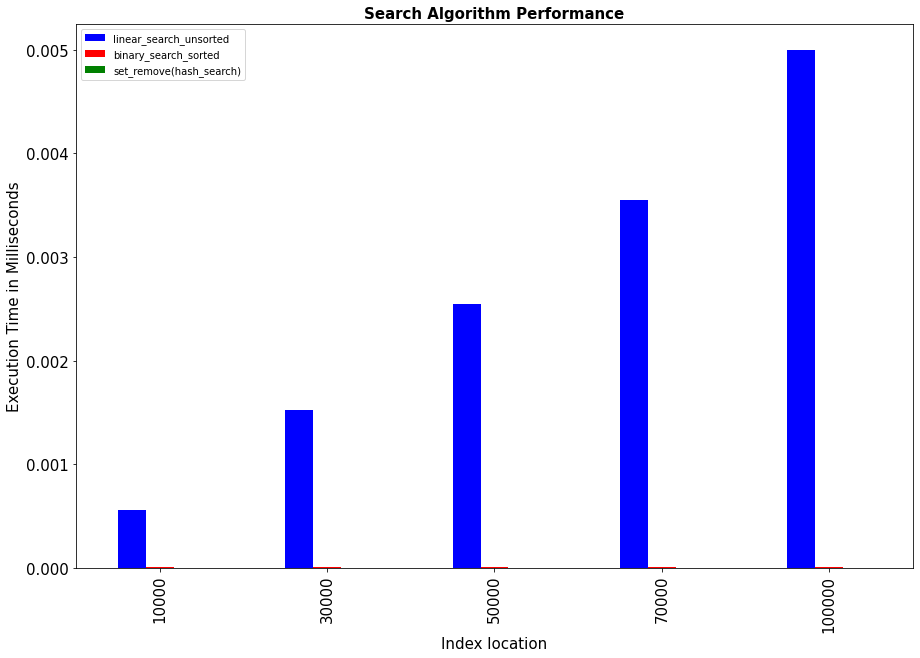

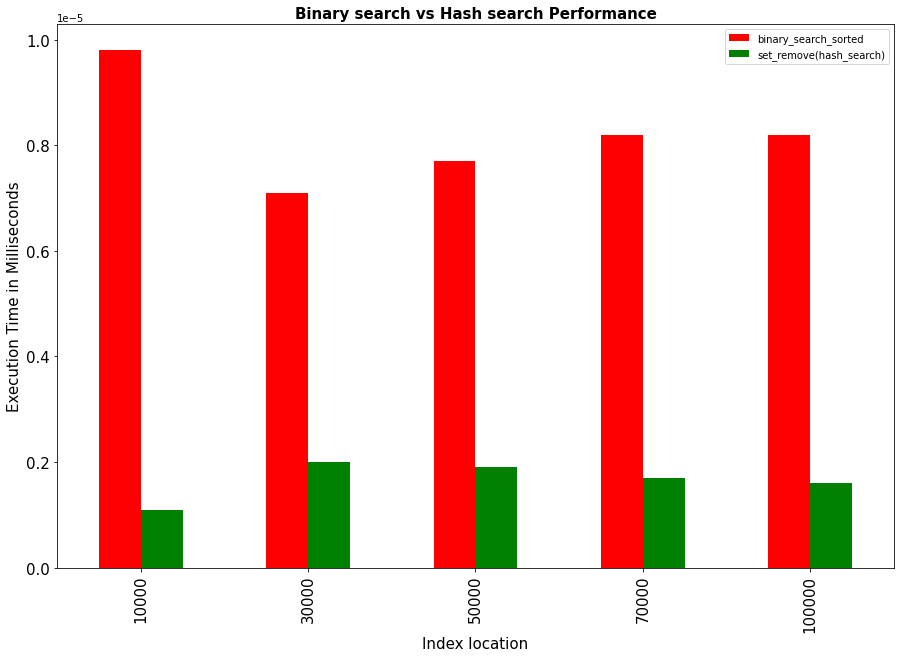

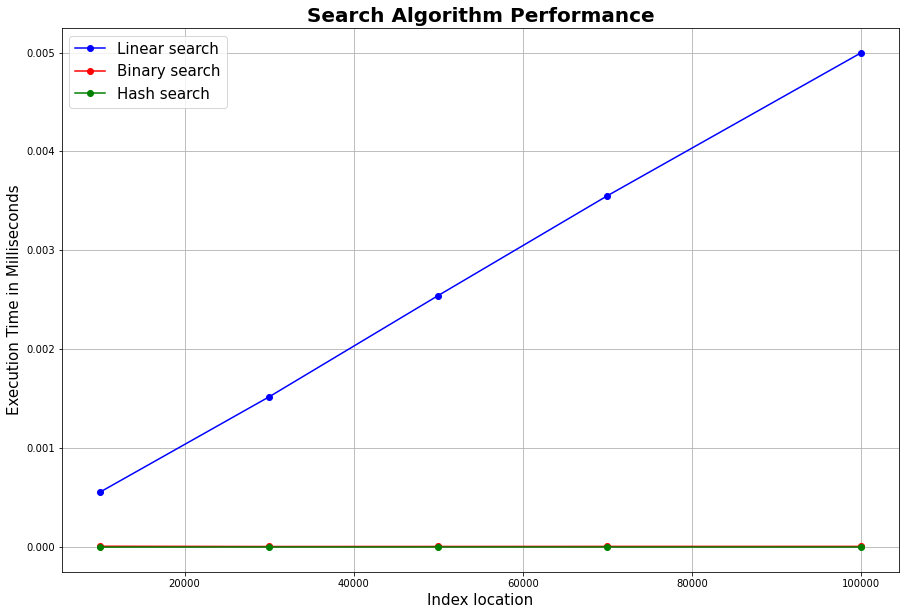

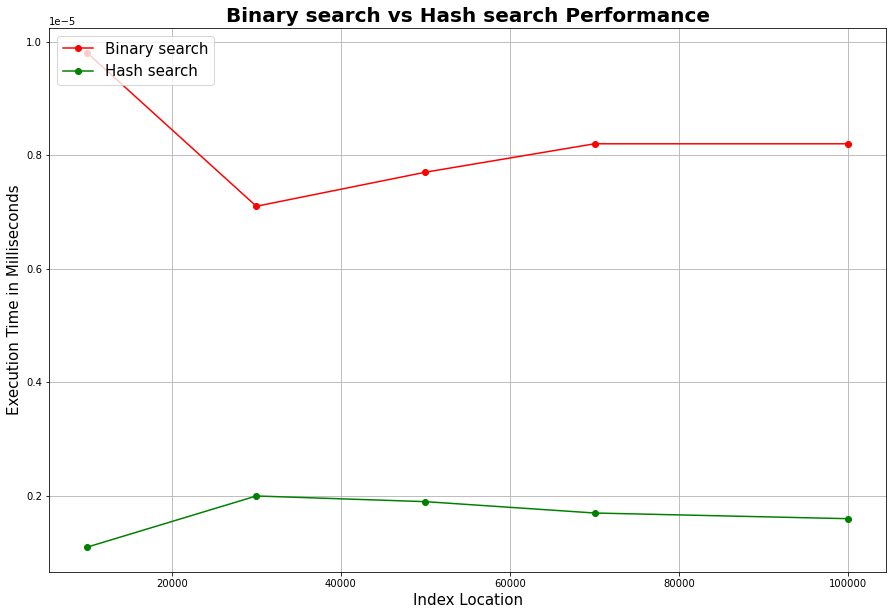

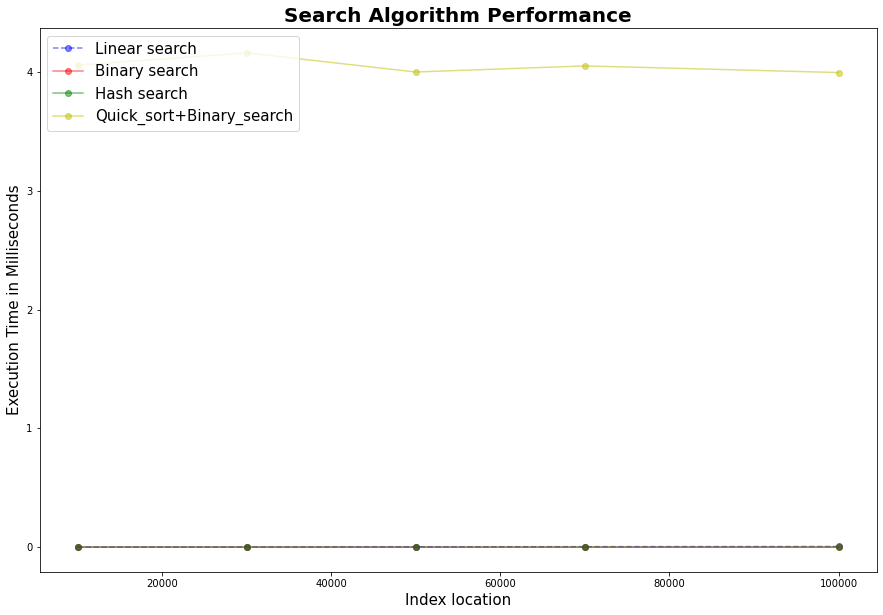

In [139]:

# plotting a bar plot to compare the runtime of linear search, binary search and Hash search
plt.rcParams["figure.figsize"] = (15,10)

ax = summary_table.plot(kind='bar',color = ['b','r','g'],fontsize = 15)
ax.set_xlabel("Index location", fontdict={'fontsize':15})
ax.set_ylabel("Execution Time in Milliseconds", fontdict={'fontsize':15})
ax.set_title("Search Algorithm Performance",fontweight="bold", size=15)
#ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.2e'))

plt.show(ax)

# plotting a bar plot to compare the runtime of  binary search and Hash search
axx = summary_table.iloc[:,1:].plot(kind='bar', color = ['r','g'],  fontsize = 15)
axx.set_xlabel("Index location", fontdict={'fontsize':15})
axx.set_ylabel("Execution Time in Milliseconds", fontdict={'fontsize':15})
axx.set_title("Binary search vs Hash search Performance",fontweight="bold", size=15)
plt.show(axx)





# plot line graph to compare runtime of linear search, binary search and Hash search

plt.rcParams["figure.figsize"] = (15,10)
plt.grid()
plt.plot(summary_table.index, summary_table["linear_search_unsorted"], 'b-o',
         summary_table.index, summary_table["binary_search_sorted"], 'r-o',
         summary_table.index, summary_table["set_remove(hash_search)"], 'g-o'
         
        )
plt.legend(["Linear search","Binary search", "Hash search"],loc=2, prop={'size': 15})
plt.title("Search Algorithm Performance", fontsize = 20, fontweight='bold')
plt.xlabel("Index location", fontsize = 15 )
plt.ylabel('Execution Time in Milliseconds' ,fontsize = 15)
#plt.yticks(np.arange(min((summary_table.iloc[:,1:]).min()), max((summary_table.iloc[:,1:]).max())+0.01, .004))
plt.show()

# plot line graph to compare runtime of  binary search and Hash search

plt.rcParams["figure.figsize"] = (15,10)
plt.grid()
plt.plot(summary_table.index, summary_table["binary_search_sorted"], 'r-o',
         summary_table.index, summary_table["set_remove(hash_search)"], 'g-o'
        
        )
plt.legend(["Binary search", "Hash search"],loc=2, prop={'size': 15})
plt.title("Binary search vs Hash search Performance", fontsize = 20, fontweight='bold')
plt.xlabel("Index Location", fontsize = 15 )
plt.ylabel('Execution Time in Milliseconds' ,fontsize = 15)
plt.show()


#  plot line graph to compare runtime of  binary search and Hash search and quicksort+binarysearch

plt.plot(summary_table.index, summary_table["linear_search_unsorted"], 'b--o',
         summary_table.index, summary_table["binary_search_sorted"], 'r-o',
         summary_table.index, summary_table["set_remove(hash_search)"], 'g-o',
         summary_table.index, time_quicksort_binary_search, "y-o", alpha=0.5
         
        )
plt.legend(["Linear search","Binary search", "Hash search", "Quick_sort+Binary_search"],loc=2, prop={'size': 15})
plt.title("Search Algorithm Performance", fontsize = 20, fontweight='bold')
plt.xlabel("Index location", fontsize = 15 )
plt.ylabel('Execution Time in Milliseconds' ,fontsize = 15)
#plt.yticks(np.arange(min((summary_table.iloc[:,1:]).min()), max((summary_table.iloc[:,1:]).max())+0.01, .004))
plt.show()

# Discussion and Executive Summary

The above table and graph shows that the runtime for linear search on the unsorted array increases linearly. As the index position increases , the run time of binary search on sorted array is more or less constant and significantly faster than linear search. The set remove function on the Set of 100k names is also constant but is a lot faster than binary search.

Set in python is a collection of items that eliminates any duplicated entries. The data structure used in Set is Hashing, which a process of mapping keys to values into the hash table by using a hash function and it is a popular technique used to perform insertion, deletion and traversal with average time complexity of O(1). The time complexity of linear search is O(n) and binary search is O(log n). A set.remove() method which can be applied on Sets, uses the hashing function to search and remove the item from the memory.  

The time complexity of linear search is O(n) on sorted or unsorted arrays and binary search is O(log n), but it requires a sorted array. If the array is unsorted, linear search time complexity is O(n) but for binary search, sorting a list first takes O(n log n) time and then binary search takes O(log n) time. This makes linear search more efficient for unsorted arrays. 

As a data engineer, it is important understand how hashing works. There are many applications that can utilize this data structure, that requires fast search (O(1)) and removes duplicates. For example, a website could utilize hash maps to cache search results by users so that they can be served quickly on subsequent searches. Hashing provides a high-performance solution that cannot be replicated by any searching algorithm.
